# **Step 1: Load the dataset**

In [2]:
import pandas as pd

In [3]:
# Load the dataset
file_path = "/content/airline5 (Dataset).csv"  # Use the correct path in Google Colab
df = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset
df.head()

,Day,Date,Number,Price
0,0,2021-01-01,4.9375,70.26
1,1,2021-01-02,3.9617,69.32
2,2,2021-01-03,5.2143,70.53
3,3,2021-01-04,4.5041,69.84
4,4,2021-01-05,3.2543,68.64


# **Step 2: Data Preprocessing**

In [6]:
# Convert 'Date' to datetime format without specifying a format
df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# Check for any missing values
df.isnull().sum()

,0
Day,0
Date,0
Number,0
Price,0


# **Step 3: Visualization - Histogram (or Bar Chart)**

In [8]:
import matplotlib.pyplot as plt

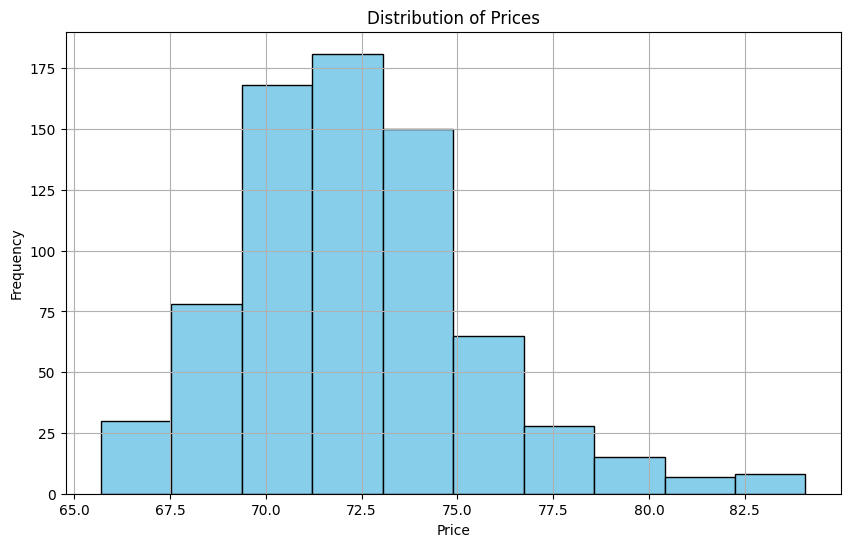

In [9]:
# Histogram of 'Price' column
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# **Step 4: Line Graph/Scatter Plot**

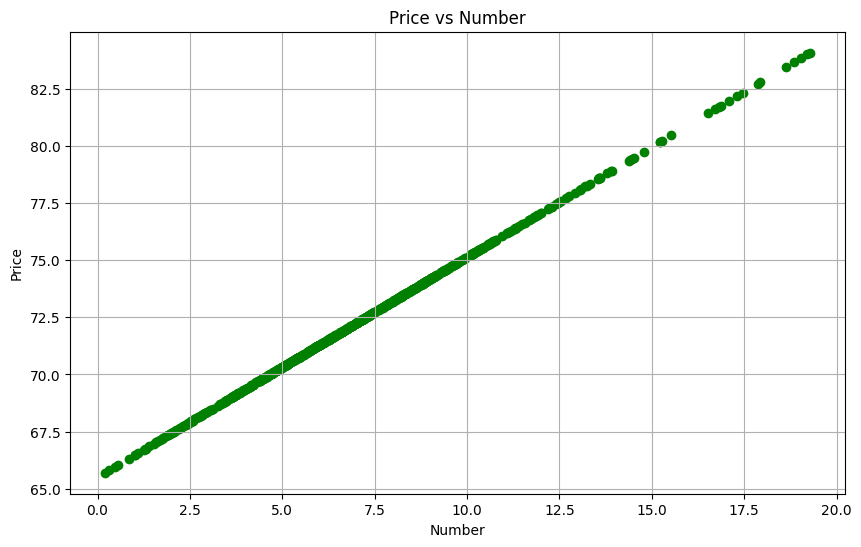

In [10]:
# Scatter plot of 'Number' vs 'Price'
plt.figure(figsize=(10, 6))
plt.scatter(df['Number'], df['Price'], color='green')
plt.title('Price vs Number')
plt.xlabel('Number')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# **Step 5: K-Means Clustering**

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Let's use 'Number' and 'Price' columns for clustering
X = df[['Number', 'Price']]

In [13]:
# Apply KMeans clustering (choosing 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

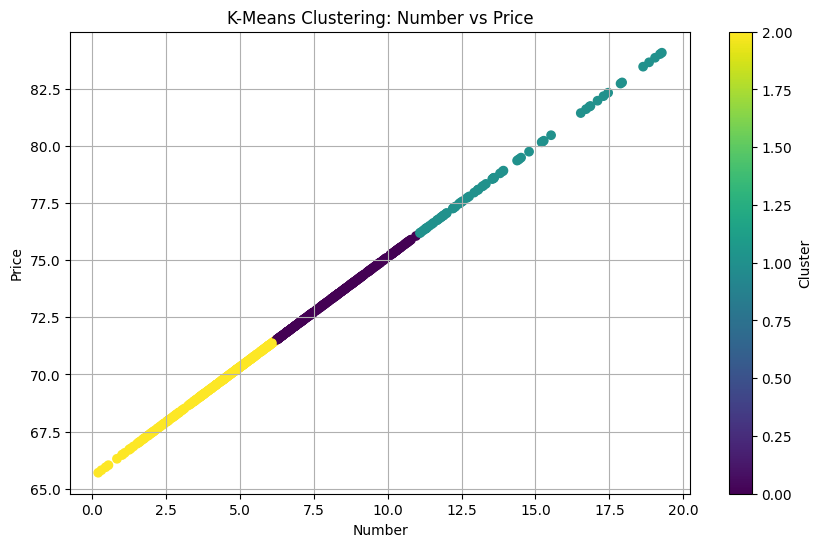

In [14]:
# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Number'], df['Price'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering: Number vs Price')
plt.xlabel('Number')
plt.ylabel('Price')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# **Step 6: Line Fitting (Linear Regression)**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Define the independent (X) and dependent (y) variables
X = df[['Number']]  # Independent variable
y = df['Price']     # Dependent variable

In [17]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [18]:
# Predict the prices using the fitted model
df['Price_Pred'] = model.predict(X)

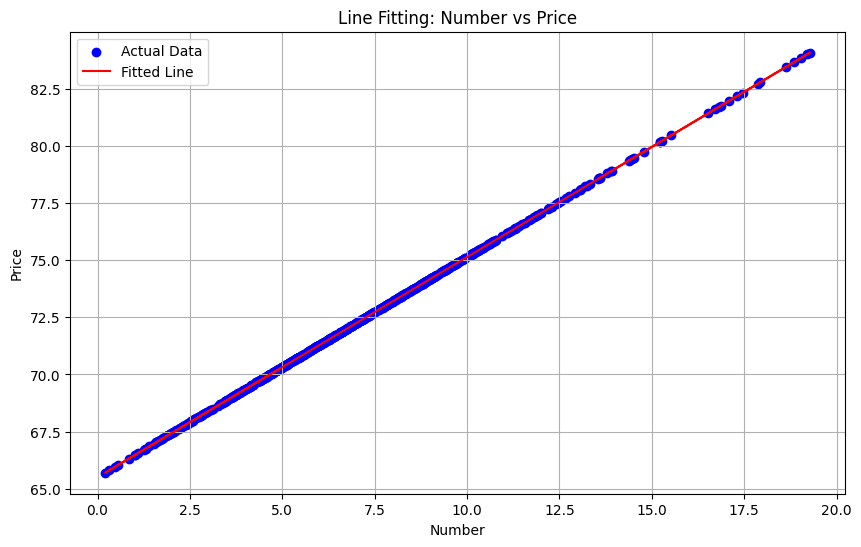

In [19]:
# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(df['Number'], df['Price'], color='blue', label='Actual Data')
plt.plot(df['Number'], df['Price_Pred'], color='red', label='Fitted Line')
plt.title('Line Fitting: Number vs Price')
plt.xlabel('Number')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# **Step 7: Confusion Matrix or Heatmap**

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Assuming price_labels has been defined as a categorical variable already
price_labels = pd.cut(df['Price'], bins=[0, 68, 69, 71], labels=['Low', 'Medium', 'High'])

In [34]:
# Map cluster labels to categorical values
# Create a mapping for the cluster labels to match price categories
cluster_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
df['Cluster_Label'] = df['Cluster'].map(cluster_mapping)

In [38]:
# Ensure the price_labels is aligned with the rows in df
# This makes sure that both price_labels and df['Cluster_Label'] have the same number of entries
df['Price_Category'] = pd.cut(df['Price'], bins=[0, 68, 69, 71], labels=['Low', 'Medium', 'High'])

In [39]:
# Re-calculate price_labels by using the 'Price_Category' from df (now aligned)
price_labels = df['Price_Category'].dropna()

In [40]:
# Now drop rows with missing values in 'Cluster_Label' to ensure they match the length of price_labels
df = df.dropna(subset=['Cluster_Label'])

In [41]:
# Ensure the cluster labels are also aligned
df['Cluster_Label'] = df['Cluster_Label'].astype('category')

In [42]:
# Now both price_labels and df['Cluster_Label'] should have the same number of rows
print(len(price_labels), len(df['Cluster_Label']))

256 730


In [44]:
# Create price categories based on 'Price'
df['Price_Category'] = pd.cut(df['Price'], bins=[0, 68, 69, 71], labels=['Low', 'Medium', 'High'])

# Drop rows with missing values in 'Cluster_Label' or 'Price_Category'
df_cleaned = df.dropna(subset=['Cluster_Label', 'Price_Category'])

# Now extract price_labels and cluster labels from the cleaned DataFrame
price_labels = df_cleaned['Price_Category']
cluster_labels = df_cleaned['Cluster_Label']

# Ensure both have the same length
print(len(price_labels), len(cluster_labels))  # Should print the same length

256 256


In [45]:
# Now compute the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(price_labels, cluster_labels)

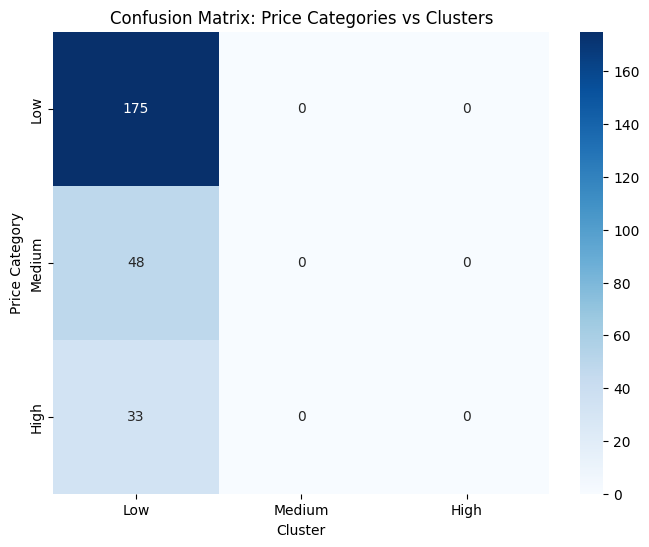

In [46]:
# Plot the confusion matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix: Price Categories vs Clusters')
plt.xlabel('Cluster')
plt.ylabel('Price Category')
plt.show()

# **Step 8: Elbow Plot for Optimal K in K-Means**

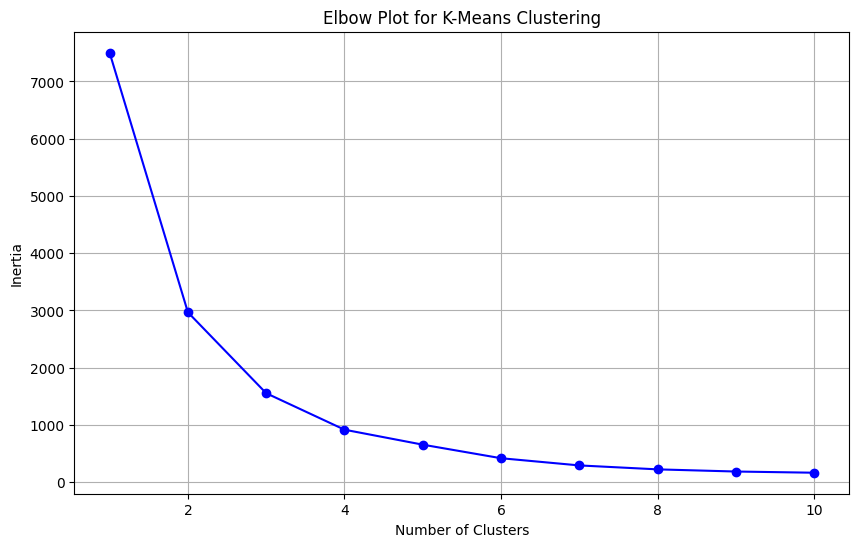

In [47]:
# Elbow plot to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', color='blue')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# **Step 9: Silhouette Plot**

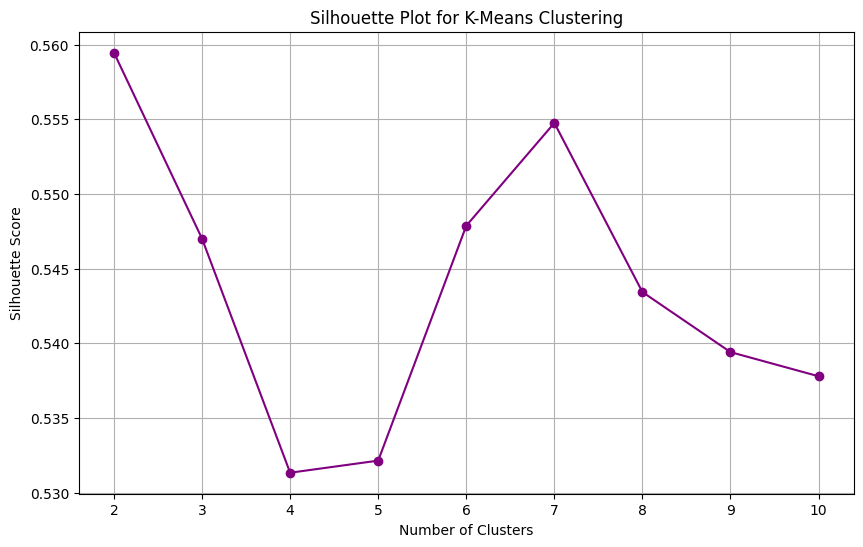

In [48]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for different values of k
sil_scores = []
for k in range(2, 11):  # Silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='purple')
plt.title('Silhouette Plot for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
